# 1. Базовая задача МНК.

**Теоретический вопрос 1.**

Пусть дана выборка точек $y_i$. Решите аналитически задачу МНК, моделируя данные постоянной величиной $\check{y}$, что отвечает минимизации функции потерь
$$
\newcommand{\suml}{\sum\limits_{i=1}^l}
\mathcal{L} = \suml (y_i - \check{y})^2 \rightarrow \min\limits_{\check{y}}.
$$

$$
\frac{\partial \mathcal{L}}{\partial \check{y}} = -2 \suml (y_i - \check{y}) = 0
\Rightarrow \check{y} = \frac{\suml y_i}{l}
$$

**Теоретический вопрос 2.**

Покажите, что прямая, построенная по методу МНК, всегда проходит через точку $(\bar{x}, \bar{y})$, где $\bar{x}$ и $\bar{y}$ - выборочные средние. Обобщите на случай многомерной регрессии.



$$
\check{y} = ax + b\\
\mathcal{L} = \suml (y_i - ax_i - b)^2
$$

$$
d \mathcal{L} = \suml 2(y_i - ax_i - b)(- x_i d a - d b) = 0\\
\suml y_i - ax_i - b = 0 \Rightarrow
b = \frac{1}{l}\suml y_i - ax_i\\
$$

$$
\mathcal{L} = \suml (y_i - ax_i + \frac{1}{l}(y_i - ax_i))^2 = \frac{l+1}{l}\suml (y_i - ax_i)^2\\
$$

$$
\frac{d \mathcal{L}}{d a} = -\frac{2(l+1)}{l} \suml (y_i - ax_i)x_i = 0 \Rightarrow 
a = \frac{\suml x_iy_i}{\suml x_i^2}; \; 
b = \frac{1}{l}\left(\suml y_i - \frac{\suml x_iy_i \suml x_i}{\suml x_i^2}\right)
$$

$$
\check{y} = \frac{\suml x_iy_i}{\suml x_i^2}x + 
\frac{1}{l}\left(\suml y_i - \frac{\suml x_iy_i \suml x_i}{\suml x_i^2}\right)
$$

$$
\check{y}\left(\frac{1}{l}\suml x_i\right) = \frac{1}{l}\suml y_i
$$
В многомерном случае сложно че-то

**Практическое задание.**

Для четырех выборок из квартета Энскомба вычислите выборочные дисперсии $x$ и $y$ 
координат, а также коэффициент линейной корреляции Пирсона. Изобразите выборки на графиках. 
Данные можно получить в системе јuруter с помощью библиотеки seaborn, вызвав метод load_dataset('anscombe').

In [10]:
import seaborn

df = seaborn.load_dataset('anscombe')

In [19]:
df.groupby('dataset').var()

,x,y
dataset,,
I,11.0,4.127269
II,11.0,4.127629
III,11.0,4.122620
IV,11.0,4.123249


In [20]:
df.groupby('dataset').corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

dataset
I      Axes(0.125,0.11;0.775x0.77)
II     Axes(0.125,0.11;0.775x0.77)
III    Axes(0.125,0.11;0.775x0.77)
IV     Axes(0.125,0.11;0.775x0.77)
dtype: object

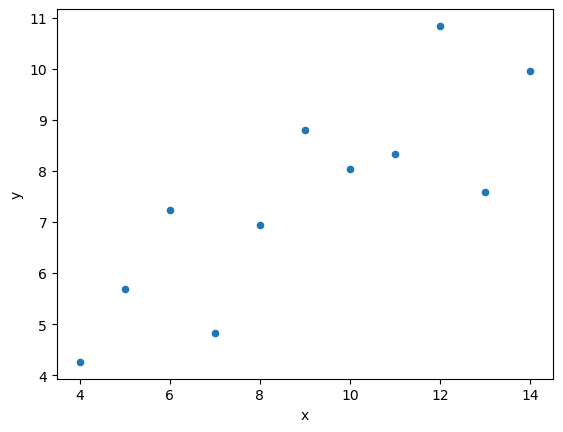

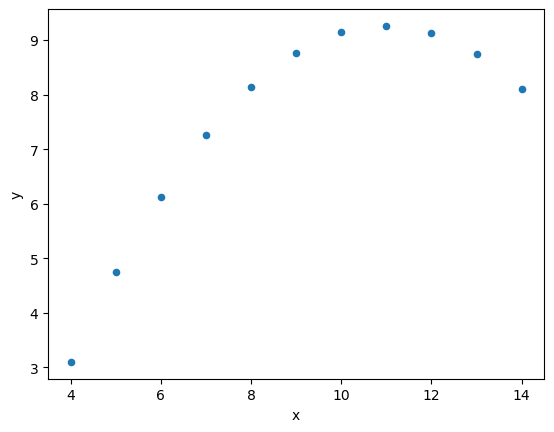

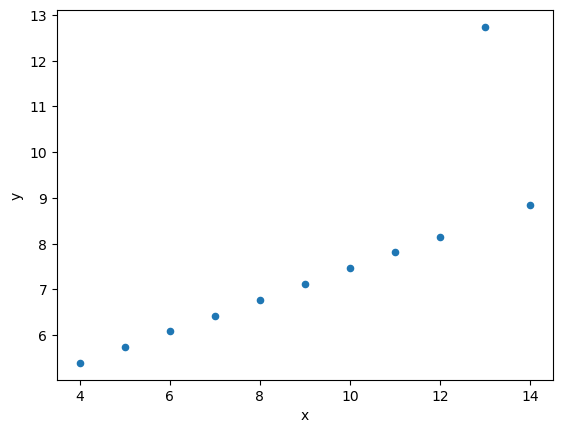

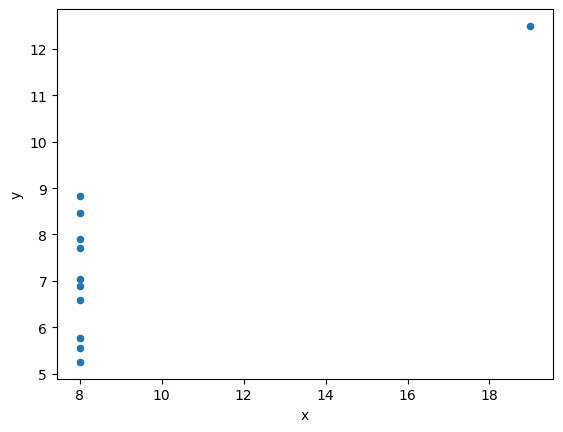

In [24]:
df.groupby('dataset').plot(x='x', y='y', kind='scatter')

# 3. Геометрический смысл псевдообратной матрицы.

На лекции обсуждалось, что метод наименьших квадратов - это способ поставить задачу о решении переопределенной системы 
$Xw = y$, которая имеет явный ответ, выражающийся через левую псевдообратную матрицу для X. 
Для недоопределенной системы $Xw = y$ (имеющей бесконечно много решений, объектов меньше, чем признаков) 
можно поставить задачу о поиске решения с минимальной $l_2$-нормой весов $\|w\|^2= w^Tw$. 
Решите такую задачу и покажите, что ответ выражается через правую псевдообратную матрицу для $X$. 
Считайте, что прямоугольная матрица $X$ имеет полный ранг (максимально возможный).

$$
\mathcal{L} = \|w\|^2 + \lambda (y - Xw) = w_{i}w_{i} + \lambda_i(y_i - X_{ij}w_j) \\
\frac{\partial \mathcal{L}}{\partial w_k} = 2w_k - \lambda_iX_{ik} = 0
\Rightarrow w_k = \frac{1}{2}\lambda_i X_{ik}\\
\frac{\partial \mathcal{L}}{\partial \lambda_k} = y_k - X_{kj}w_j = 0
\Rightarrow y_k = X_{kj}w_j
$$

$$
y_k = \frac{1}{2}X_{kj}X_{ij}\lambda_i; \; y = \frac{1}{2}XX^T\lambda; \; \lambda = 2\left(XX^T\right)^{-1}y
$$

$$
w = \frac{1}{2}X^T\lambda = X^T\left(XX^T\right)^{-1}y
$$

# 4. Матрица объект-признак.

**Теоретический вопрос 1.**

Пусть $X$ - матрица объект-признак (размерность $l \times F$), для которой сингулярное разложение имеет вид
$X = V\sqrt{\Lambda}U^T$. После понижения размерности данных с помощью метода главных компонент, в диагональной матрице 
$\Lambda = diag\{\lambda_1 \geq \cdot\cdot\cdot\geq \lambda_F\}$ оставляются только $\tilde{F}$
 наибольших сингулярных чисел: $\tilde{\Lambda} = diag\{\lambda_1 \geq \cdot \cdot \cdot \geq \lambda_{\tilde{F}}\}$
. При этом данные, как правило, можно восстановить только с некоторой ошибкой: $\tilde{X} = V\sqrt{\tilde{\Lambda}}U^T \neq X$. Покажите, что норма Фроббениуса ошибки выражается через сумму по оставшимся сингулярным числам:
$$
    \frac{1}{l}\|X-\tilde{X}\|_F^2 = \sum\limits_{i=\tilde{F}+1}^F \lambda_i
$$

$$
\|X-\tilde{X}\|_F^2 = tr\left((X-\tilde{X})^\dagger (X-\tilde{X})\right) = 
    tr\left(X^\dagger X  + \tilde{X}^\dagger \tilde{X} - X^\dagger \tilde{X} - \tilde{X}^\dagger X\right) = \\
= tr\left(U\sqrt{\Lambda}V^T V\sqrt{\Lambda}U^T \right) +
    tr\left(U\sqrt{\tilde\Lambda}V^T V\sqrt{\tilde\Lambda}U^T\right) -
    tr\left(U\sqrt{\Lambda}V^T V\sqrt{\tilde\Lambda}U^T \right) -
    tr\left(U\sqrt{\tilde\Lambda}V^T V\sqrt{\Lambda}U^T \right) = \\
= tr\left(\Lambda\right) + tr\left(\tilde\Lambda\right) - 
    2tr\left(\sqrt{\Lambda \tilde\Lambda}\right) =
    \sum\limits_{i=1}^F \lambda_i + \sum\limits_{i=1}^\tilde{F} \lambda_i - 2\sum\limits_{i=1}^\tilde{F} \lambda_i =
    \sum\limits_{i=\tilde{F}+1}^F \lambda_i
$$

**Теоретический вопрос 2.**

Покажите, что сингулярный вектор матрицы $X$, отвечающий наибольшему сингулярному числу, является решением задачи

$$
u = argmax_{\|u\|=1}(Xu)^2,
$$

где подразумевается матричное умножение $X$ на $u$.

$$
(Xu)^2 = u^TX^TXu = u^T U \Sigma V^T  V\Sigma U^T u = u^T U \Sigma U^T u = \left|w = U^T u\right| = w^T \Sigma w = \\
= \left|w = с_i s_i, \, Us_i - сингулярные \; векторы \,(ортонормированные)\right| =
    \sum\limits_{i, j} c_ic_j s_i^T\Sigma s_j = \sum\limits_{i, j} c_ic_j\sigma_j(s_i, s_j) = \sum\limits_i c_i^2 \sigma_i
$$

$$
\|u\|^2 = \|Uw\|^2 = w^T U^T U w = w^T w = \sum_i c_i^2
$$

$$
\frac{(Xu)^2}{\|u\|^2} = \frac{\sum\limits_i c_i^2\sigma_i}{\sum\limits_i c_i^2}
    \Rightarrow \sup\limits_{\|u\|=1} (Xu)^2 = \sup\limits_{u} \frac{(Xu)^2}{\|u\|^2} = \sigma_{max},
    \, достигается \, при \, c_i \sim \delta_{im}, \quad \sigma_m := \sigma_{max}
$$
<center>То есть максимум достигается для сингулярного вектора $u$ c максимальным сингулярным числом</center>

**Практическое задание.**

Сгенерируйте случайную симметричную матрицу $A$ размера $3 \times 3$. Сгенерируйте $N$ элементов из 
нормального распределения $P \propto e^{-x^TAx}$ (получится матрица объект-признак $X$ размерности $N \times 3$). 
Визуализируйте полученное облако точек (для построения интерактивных трехмерных графиков можно воспользоваться пакетом ipyml в системе jupyter). Примените к матрице $X$ метод главных компонент, визуализируйте сингулярные вектора вместе с облаком точек, а также двумерные проекции элементов выборки на плоскости, задаваемые сингулярными векторами.